<a href="https://colab.research.google.com/github/nnaemekaukpa/Leveraging-Deep-Learning-Architecture-for-Accurate-and-Efficient-Bone-Cancer-Detection-/blob/main/Bone_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## aallows loading of operating system
import os
## allows loading of image dataset
import cv2
## for plotting
import matplotlib.pyplot as plt
## for array
import numpy as np
## allows selection of any images
import random
## helps in resizing of images
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,

        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        #shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [4]:
train_dataset  = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/bone cancer detection.v2i.folder/train',
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 32)


Found 16917 images belonging to 3 classes.


In [5]:
valid_dataset = valid_datagen.flow_from_directory(directory = '/content/drive/MyDrive/bone cancer detection.v2i.folder/valid',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 32)

Found 175 images belonging to 2 classes.


In [6]:
test_dataset = test_datagen.flow_from_directory(directory ='/content/drive/MyDrive/bone cancer detection.v2i.folder/test',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  batch_size = 32)

Found 891 images belonging to 2 classes.


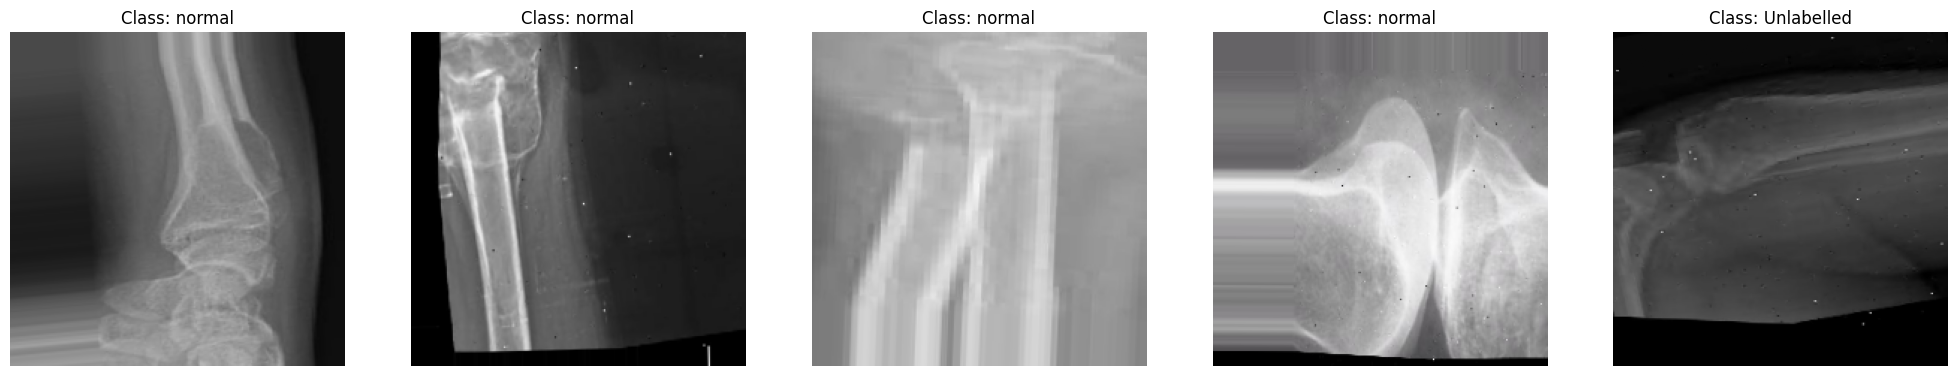

In [8]:


# List of class names
CLASSES = ['cancer', 'normal', 'Unlabelled']

# Get a batch of images from the train dataset
images, labels = next(train_dataset)  # 'train_dataset' is the generator

# Set up the plot
fig, axes = plt.subplots(1, 5, figsize=(25, 15))

# Loop through the first 5 images in the batch
for i in range(5):
    ax = axes[i]
    ax.imshow(images[i])  # Display image
    ax.axis('off')  # Turn off axis
    class_index = np.argmax(labels[i])  # Get the index of the class
    ax.set_title(f"Class: {CLASSES[class_index]}")  # Display the class name

plt.show()


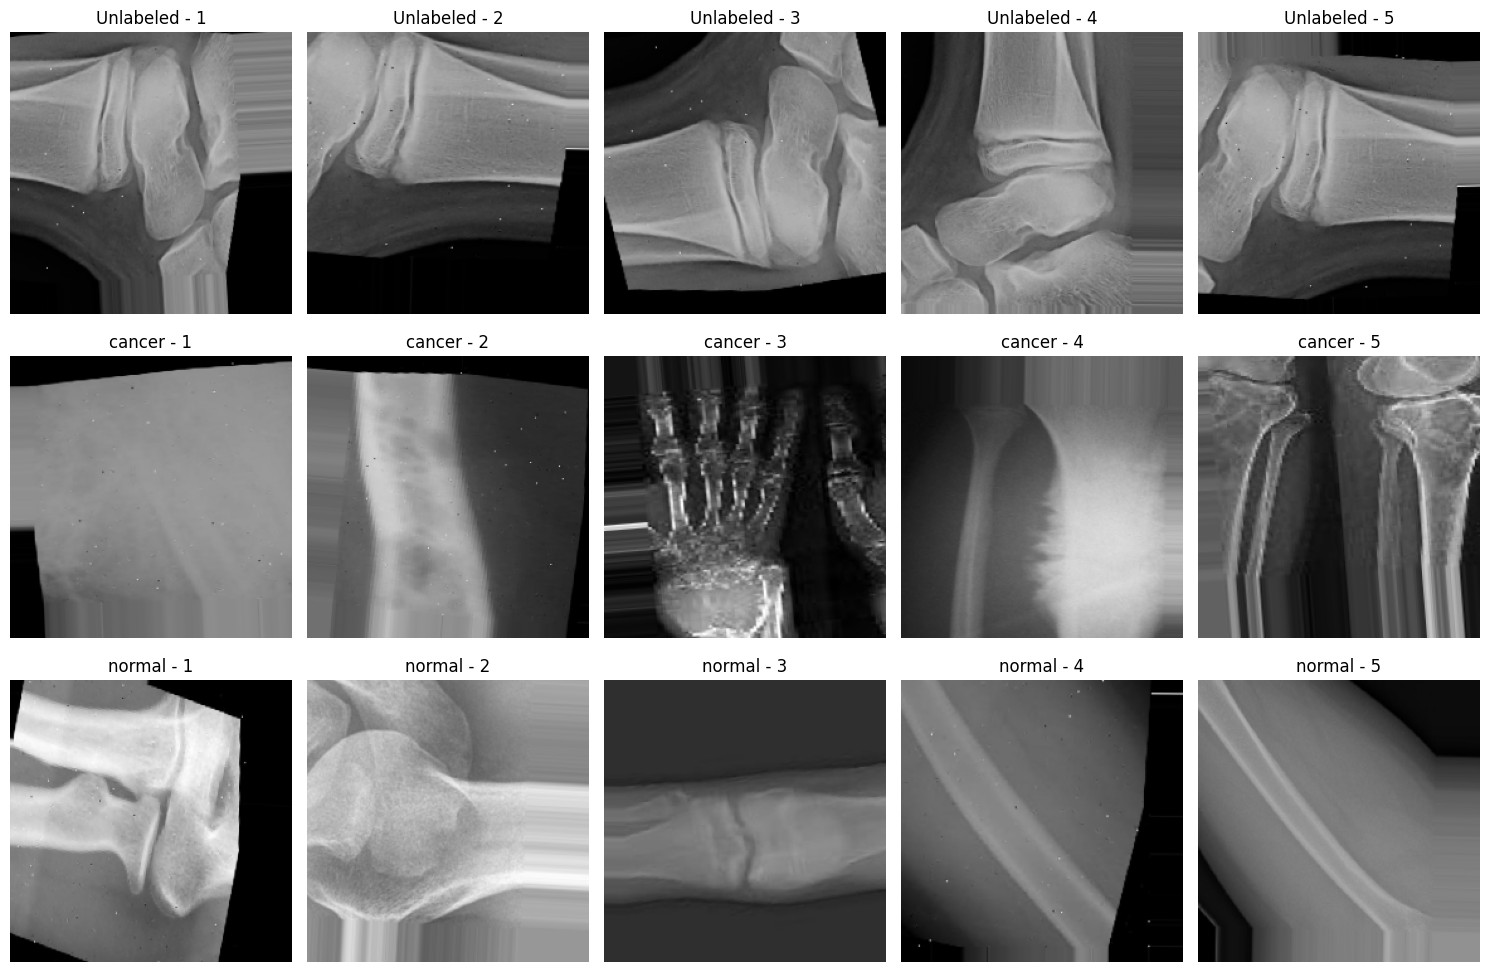

In [11]:

# Number of images to display per class
num_images = 5
class_names = list(train_dataset.class_indices.keys())

# Create a list to store images for each class
images_to_display = {class_name: [] for class_name in class_names}

# Loop through batches and collect images
for x_batch, y_batch in train_dataset:
    # Iterate over the batch and collect images for each class
    for i in range(x_batch.shape[0]):
        label_index = np.argmax(y_batch[i])  # Get the class index for this image
        class_name = class_names[label_index]

        # Only collect images until we have enough for each class
        if len(images_to_display[class_name]) < num_images:
            images_to_display[class_name].append(x_batch[i])

    # Stop if we have collected enough images for all classes
    if all(len(images_to_display[class_name]) >= num_images for class_name in class_names):
        break

# Plot the images for each class
fig, axes = plt.subplots(len(class_names), num_images, figsize=(15, 10))  # Rows = number of classes, Columns = num_images
for i, class_name in enumerate(class_names):
    for j in range(num_images):
        ax = axes[i, j]
        ax.imshow(images_to_display[class_name][j])
        ax.axis('off')
        ax.set_title(f"{class_name} - {j + 1}")

plt.tight_layout()
plt.show()


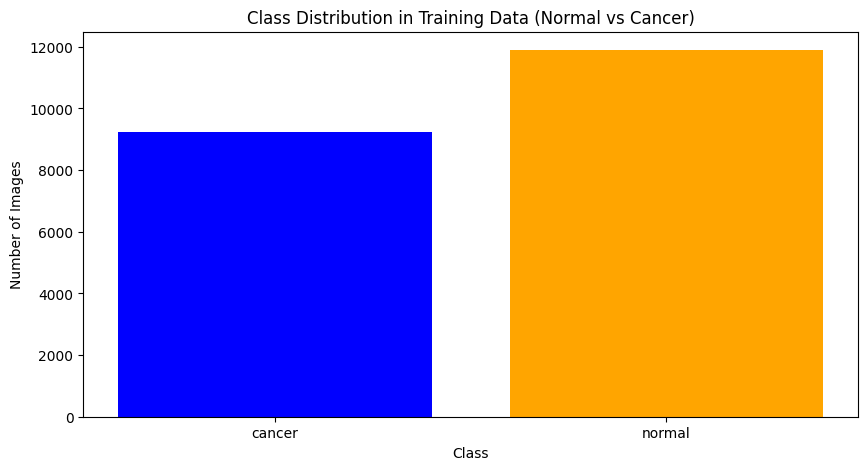

In [10]:


# Function to count images in each class
def count_images_in_class(directory):
    class_counts = {}
    for subdir in os.listdir(directory):
        class_path = os.path.join(directory, subdir)
        if os.path.isdir(class_path):
            # Only count 'normal' and 'cancer' classes
            if subdir in ['normal', 'cancer']:
                class_counts[subdir] = len(os.listdir(class_path))
    return class_counts

# Get counts for train, valid, and test datasets
train_counts = count_images_in_class('/content/drive/MyDrive/bone cancer detection.v2i.folder/train')
valid_counts = count_images_in_class('/content/drive/MyDrive/bone cancer detection.v2i.folder/valid')
test_counts = count_images_in_class('/content/drive/MyDrive/bone cancer detection.v2i.folder/valid')

# Plotting Bar Chart for Train Data
plt.figure(figsize=(10, 5))
plt.bar(train_counts.keys(), train_counts.values(), color=['blue', 'orange'])
plt.title('Class Distribution in Training Data (Normal vs Cancer)')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()
